#### [PREV](4.OOP_Logistic_Regression.ipynb) | [HOME](../README.md) | [NEXT](6.OOP_Neural_Network_Adv.ipynb)


#  Neural Network Linear Regression: Simple approach

This guide trains a neural network model perform Linear Regression on the same [insects](data\insects.csv) you have been using. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.18.0


#### Step 2: Import The Data

In [26]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Split The Data into Training And Testing Sets

In [17]:
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

X_insects = pd.get_dummies(insects[['continent', 'latitude', 'sex']], dummy_na=True, dtype='int')

y_insects = insects['wingsize']

X_train, X_test, y_train, y_test = train_test_split(X_insects, y_insects, test_size=0.3, random_state=42)

#### Step 4: Visualise The Data

Text(0, 0.5, 'Wing Span')

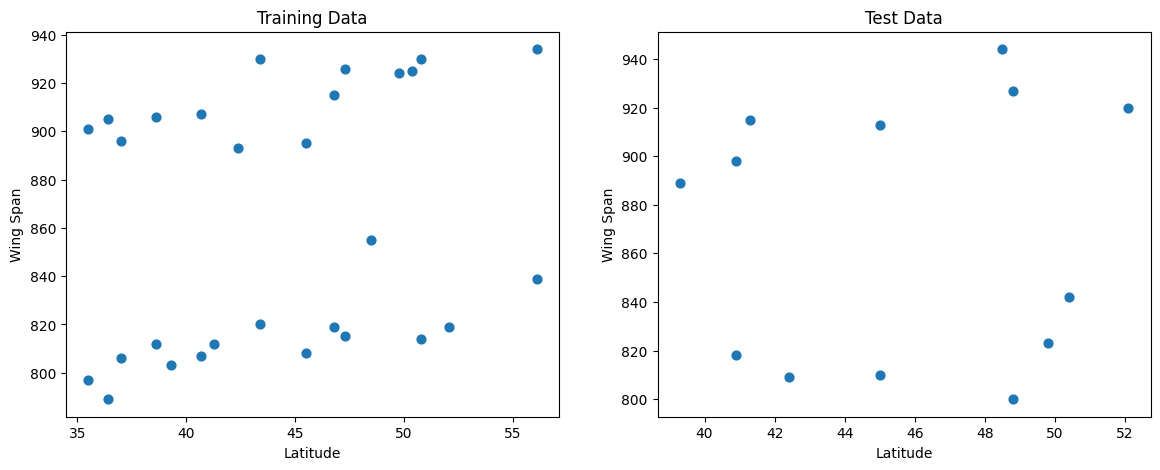

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train[['latitude']], y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Wing Span")


axs[1].scatter(X_test[['latitude']], y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Wing Span")

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [19]:
model = keras.Sequential([
    layers.Input(shape=(3,)),        # Input layer
    layers.Dense(3, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)   # Output layer with a single neuron (for regression)
])

In [20]:
model.compile(optimizer='adam', loss='MeanAbsoluteError')

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [21]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/200


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 867.0546 - val_loss: 862.7626
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 855.7393 - val_loss: 860.6208
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 848.8835 - val_loss: 858.4717
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 851.5469 - val_loss: 856.3164
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 848.3411 - val_loss: 854.1582
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 838.3163 - val_loss: 851.9957
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 840.5541 - val_loss: 849.8123
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 837.3203 - val_loss: 847.6320
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 839.3951 - val_loss: 845.4772
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 832.8347 - val_loss: 843.2778
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 842.6179 - val_loss: 841.0626
Epoch 12/200
15/15 ━━━━━━━━━━━━

#### Step 7: Evaluate The Model

In [22]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 82.2542
Test Loss: 82.2542


### Step 8: Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [23]:
# Use the trained model to make predictions on new data
new_data = np.array([[1, 38, 0]])
predictions = model.predict(new_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[747.7608]]


#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


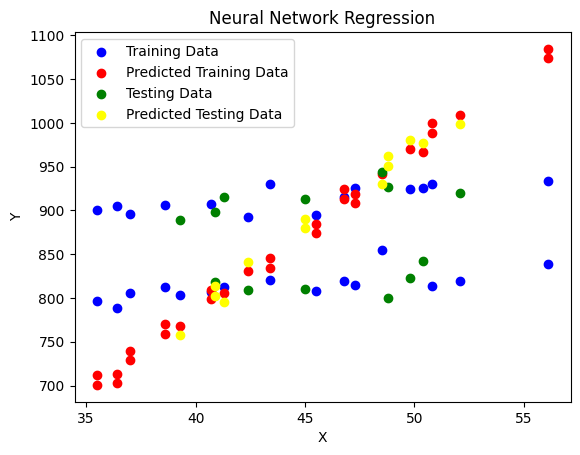

In [24]:
# Plot the actual data and model predictions
plt.scatter(X_train[['latitude']], y_train, label='Training Data', color='blue')
plt.scatter(X_train[['latitude']], model.predict(X_train), label='Predicted Training Data', color='red')
plt.scatter(X_test[['latitude']], y_test, label='Testing Data', color='green')
plt.scatter(X_test[['latitude']], model.predict(X_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [25]:
predictions = model.predict(X_train).flatten()
table = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': y_train - predictions
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost:.5f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
    Target  Predicted result        Loss
9      924        970.008240  -46.008240
15     895        873.977722   21.022278
33     803        767.974182   35.025818
16     926        907.879883   18.120117
36     808        884.748291  -76.748291
35     820        845.195862  -25.195862
0      901        700.674377  200.325623
24     807        809.384644   -2.384644
5      893        830.632751   62.367249
11     905        702.583435  202.416565
40     819       1009.056274 -190.056274
1      896        728.926208  167.073792
31     814        999.613403 -185.613403
21     797        711.445007   85.554993
2      906        759.061462  146.938538
32     789        713.354065   75.645935
41     839       1084.394409 -245.394409
3      907        798.614014  108.385986
37     815        918.650574 -103.650574
23     812        769.832031   42.167969
34     812        805.643250    6.356750
10     930        988.842834  -58.842834
22     806        7